In [12]:
%load_ext autoreload
%autoreload
import param_search as ps

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH -o %J.stdout
#SBATCH -e %J.stderr
pwd
product=`python3 -c "print({term1}*{term2})"`
quotient=`python3 -c "print({term1}/{term2})"`

echo "product quotient" > {job_name}.metrics
echo "$product $quotient" >> {job_name}.metrics
'''
name = 'job_{term1}_{term2}'

In [18]:
param_space = ps.ParamSpace(term1=range(4), term2=range(4))
len(param_space)

16

In [19]:
jobs = ps.submit(template, name, param_space, use='local')
jobs

100%|██████████| 16/16 [00:01<00:00, 13.58it/s]


,term1,term2,job_name,stdout,stderr,work_dir
0,0,0,job_0_0,/ocean/projects/asc170022p/mtragoza/param_sear...,"Traceback (most recent call last):\n File ""<s...",./job_0_0
1,0,1,job_0_1,/ocean/projects/asc170022p/mtragoza/param_sear...,,./job_0_1
2,0,2,job_0_2,/ocean/projects/asc170022p/mtragoza/param_sear...,,./job_0_2
3,0,3,job_0_3,/ocean/projects/asc170022p/mtragoza/param_sear...,,./job_0_3
4,1,0,job_1_0,/ocean/projects/asc170022p/mtragoza/param_sear...,"Traceback (most recent call last):\n File ""<s...",./job_1_0
5,1,1,job_1_1,/ocean/projects/asc170022p/mtragoza/param_sear...,,./job_1_1
6,1,2,job_1_2,/ocean/projects/asc170022p/mtragoza/param_sear...,,./job_1_2
7,1,3,job_1_3,/ocean/projects/asc170022p/mtragoza/param_sear...,,./job_1_3
8,2,0,job_2_0,/ocean/projects/asc170022p/mtragoza/param_sear...,"Traceback (most recent call last):\n File ""<s...",./job_2_0
9,2,1,job_2_1,/ocean/projects/asc170022p/mtragoza/param_sear...,,./job_2_1


In [20]:
print(jobs.iloc[0].stderr)

Traceback (most recent call last):
  File "<string>", line 1, in <module>
ZeroDivisionError: division by zero



In [21]:
%autoreload
metrics = ps.metrics(jobs)
metrics

,term1,term2,job_name,stdout,stderr,work_dir,product,quotient
0,0,0,job_0_0,/ocean/projects/asc170022p/mtragoza/param_sear...,"Traceback (most recent call last):\n File ""<s...",./job_0_0,0,NaN
1,0,1,job_0_1,/ocean/projects/asc170022p/mtragoza/param_sear...,,./job_0_1,0,0.000000
2,0,2,job_0_2,/ocean/projects/asc170022p/mtragoza/param_sear...,,./job_0_2,0,0.000000
3,0,3,job_0_3,/ocean/projects/asc170022p/mtragoza/param_sear...,,./job_0_3,0,0.000000
4,1,0,job_1_0,/ocean/projects/asc170022p/mtragoza/param_sear...,"Traceback (most recent call last):\n File ""<s...",./job_1_0,0,NaN
5,1,1,job_1_1,/ocean/projects/asc170022p/mtragoza/param_sear...,,./job_1_1,1,1.000000
6,1,2,job_1_2,/ocean/projects/asc170022p/mtragoza/param_sear...,,./job_1_2,2,0.500000
7,1,3,job_1_3,/ocean/projects/asc170022p/mtragoza/param_sear...,,./job_1_3,3,0.333333
8,2,0,job_2_0,/ocean/projects/asc170022p/mtragoza/param_sear...,"Traceback (most recent call last):\n File ""<s...",./job_2_0,0,NaN
9,2,1,job_2_1,/ocean/projects/asc170022p/mtragoza/param_sear...,,./job_2_1,2,2.000000


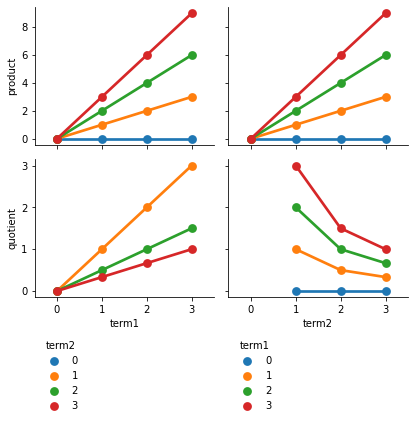

In [23]:
fig = ps.plot(metrics, x=['term1', 'term2'], y=['product', 'quotient'])

In [27]:
param_space_a = ps.ParamSpace(type='a', param=[1,2,3])
param_space_b = ps.ParamSpace(type='b', param=[4,5,6])
param_space_c = ps.ParamSpace(other_param=1.5)

# addition iterates over the param spaces sequentially
#   which requires that the keys be the same
param_space_ab = param_space_a + param_space_b

# scalar multiplication just repeats the samples
#   which can be useful for balanced samples of two subspaces
param_space_ab = 10 * param_space_ab

# multiplying two spaces produces their Cartesian product
#   which requires that the keys be different
param_space_abc = param_space_ab * param_space_c

len(param_space_abc) # 60

60